## Imports


In [5]:
import numpy
import cv2

from functools import lru_cache

In [6]:
from modules.zoomTestBench import Zoom

## Instances


## Functions


In [7]:
from IPython.display import Image, display, clear_output


def show_frame(frame: numpy.ndarray, clear: bool = True):
    """Displays and image to the output.

    Args:
        frame (numpy.ndarray): The image to show.
        clear (bool): Wether to clear the output before showing the image.
    """

    frame_width = frame.shape[1]
    frame_height = frame.shape[0]

    cv2.putText(
        frame,
        f"({frame_width} x {frame_height})",
        (15, 30),
        cv2.FONT_HERSHEY_TRIPLEX,
        1,
        (0, 0, 255),
        2,
    )

    params = [cv2.IMWRITE_JPEG_QUALITY, 50]

    jpg = cv2.imencode(".jpg", frame, params)[1].tobytes()

    if clear:
        clear_output(wait=True)

    display(Image(data=jpg))

## Code

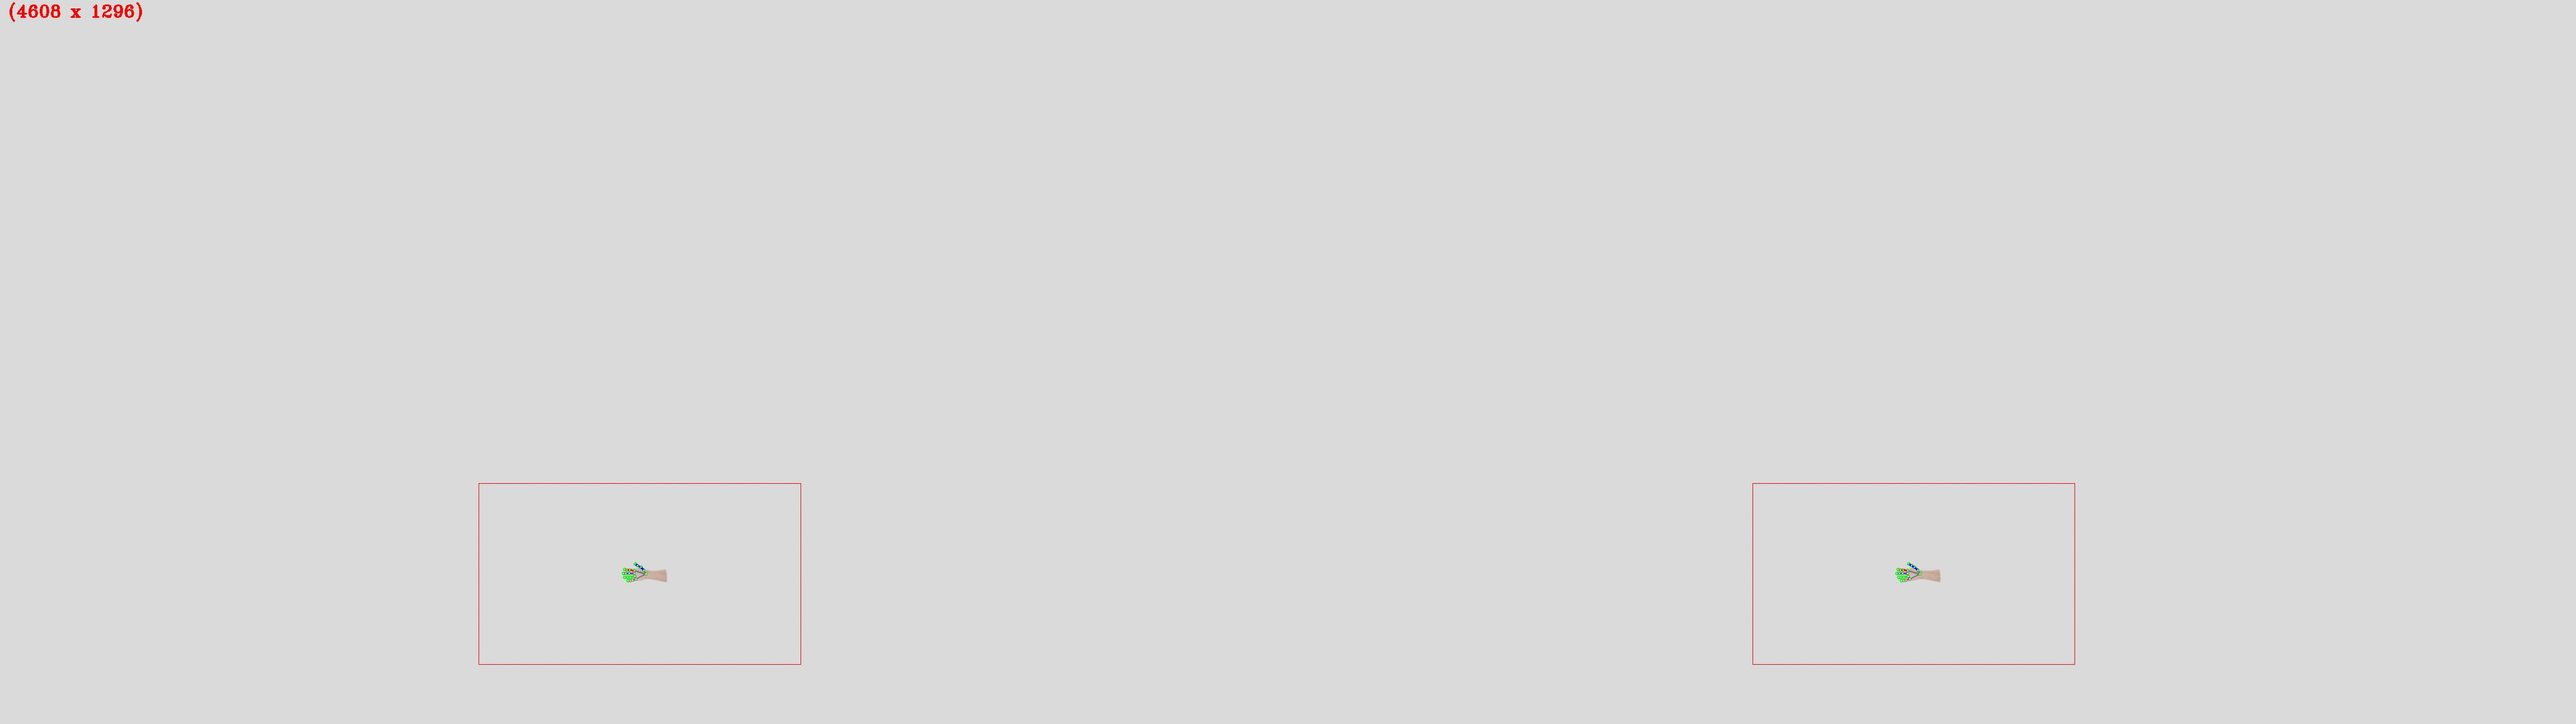

[[ 1.39282477e-02  3.94247173e+00  1.81770183e-01]
 [-3.62555176e-04  3.92934801e+00  2.07640576e-01]
 [-2.11754458e-02  3.90150984e+00  2.26136009e-01]
 [-4.10404499e-02  3.89230601e+00  2.36965995e-01]
 [-5.70397161e-02  3.89754812e+00  2.46481795e-01]
 [-6.34031374e-02  3.88106209e+00  2.04002729e-01]
 [-9.42542073e-02  3.89696845e+00  2.07799888e-01]
 [-1.12553698e-01  3.89632746e+00  2.09314598e-01]
 [-1.28369678e-01  3.88968734e+00  2.10302126e-01]
 [-6.58915990e-02  3.89138677e+00  1.85643881e-01]
 [-9.90797239e-02  3.89366471e+00  1.86229803e-01]
 [-1.19573136e-01  3.89135859e+00  1.86541083e-01]
 [-1.36616152e-01  3.89746807e+00  1.86745894e-01]
 [-6.16904212e-02  3.90232594e+00  1.68698060e-01]
 [-9.16560356e-02  3.90362938e+00  1.64255516e-01]
 [-1.10640525e-01  3.90881004e+00  1.62590686e-01]
 [-1.26737646e-01  3.91774412e+00  1.62149925e-01]
 [-5.18763030e-02  3.90723212e+00  1.52615765e-01]
 [-7.50735199e-02  3.90299587e+00  1.45934076e-01]
 [-9.01133575e-02  3.90807162e+

In [8]:
from modules.dataSetControl import DataSetControl
from modules.localiser import Localiser

localiser = Localiser()


dsc = DataSetControl()


CONTINUOUS = True
ZOOM_STATE = "zoom"

USE_SIMPLE = ZOOM_STATE in ("low_res", "full_res")
USE_FULL = ZOOM_STATE in ("full_res")


angles = dsc.get_angles()
dists = dsc.get_distances()

for angle in angles:

    print(f"Running Trial for Angle:{angle}")

    # Reset the finders
    left_hand_finder = Zoom(continuous=CONTINUOUS)
    right_hand_finder = Zoom(continuous=CONTINUOUS)

    if CONTINUOUS:
        for i in range(3):
            left_frame, right_frame = dsc.get_frames(dists[0], angle)

            left_hand = left_hand_finder.get_hand(
                left_frame, simple=USE_SIMPLE, use_full=USE_FULL
            )
            right_hand = right_hand_finder.get_hand(
                right_frame, simple=USE_SIMPLE, use_full=USE_FULL
            )

            left_frame = left_hand_finder.draw_zoom_outline(left_frame)
            right_frame = right_hand_finder.draw_zoom_outline(right_frame)

            left_frame = left_hand.draw(left_frame)
            right_frame = right_hand.draw(right_frame)

            both_new = numpy.hstack((left_frame, right_frame))

            show_frame(both_new, clear=True)

    for dist in dists:

        left_frame, right_frame = dsc.get_frames(dist, angle)

        left_hand = left_hand_finder.get_hand(
            left_frame, simple=USE_SIMPLE, use_full=USE_FULL
        )
        right_hand = right_hand_finder.get_hand(
            right_frame, simple=USE_SIMPLE, use_full=USE_FULL
        )

        predicted_points = localiser.get_coords(left_hand, right_hand)

        dsc.save_predicted(
            dist,
            angle,
            predicted_points,
            continuous=CONTINUOUS,
            zoom_state=ZOOM_STATE,
        )

        left_frame = left_hand_finder.draw_zoom_outline(left_frame)
        right_frame = right_hand_finder.draw_zoom_outline(right_frame)

        left_frame = left_hand.draw(left_frame)
        right_frame = right_hand.draw(right_frame)

        both_new = numpy.hstack((left_frame, right_frame))

        show_frame(both_new, clear=True)

        print(predicted_points)